# <center><b>Course</b></center>

<div style="text-align:center">
    <img src="../images/jupyter.png" width="600px">
    <div>
       Bertrand Néron, François Laurent, Etienne Kornobis
       <br />
       <a src=" https://research.pasteur.fr/en/team/bioinformatics-and-biostatistics-hub/">Bioinformatics and Biostatistics HUB</a>
       <br />
       © Institut Pasteur, 2021
    </div>    
</div>

# Introduction to Notebooks and Jupyter

## The concept of literate programming
>*Literate programming: Instead of imagining that our main task is to instruct a
>computer what to do, let us concentrate rather on explaining to human beings
>what we want a computer to  do.*

<img src="../images/donald_knuth.png" style="width: 20%;" align="left" margin:0 auto/>

Donald Knuth (1984)

## The concept of notebook

<img src="../images/notebook_da_vinci.png" style="width: 20%" align="right" margin:0 auto/>

A single place where live happily together:
- code
- documentation
- reasoning
- visualizations

## Many flavors of notebooks

<img src="../images/spicies_flavors.jpg" style="width: 20%" align="right" margin:0 auto/>

Many technologies have been developed in this direction:

- Jupyter: https://jupyter.org/
- R Markdown: https://rmarkdown.rstudio.com/
- Apache zeppelin: https://zeppelin.apache.org/
- Google Colaboratory: https://colab.research.google.com
- Observable (client-side): https://observablehq.com/
- Spark notebooks (http://spark-notebook.io/)
- Beaker (engulfed by Jupyter)
- ...

## Caveats
- Notebooks downsides:
  - Can be cumbersome (cell order execution...), not necessarily good as first entry point in Programming
  - Beware of bad coding practices (no proper module/library design)
  - Difficult for source control
  - Testability
  
But these issues are currently addressed !

## Why choosing Jupyter

<img src="../images/jupyter_languages.png" style="width:30%" align="right"/>

- 40+ languages supported
- Extensibility
- Community
- Recognized and pretty formatted by GitLab and GitHub


## The main idea of Jupyter <img src="../images/jupyter.png" style="width: 20%" align="right" margin:0 auto/>

An open-source web application to interactively represent a single **json** file where live happily together:
- code
- documentation
- reasoning
- visualizations (simple and interactive)

Feature overview:
- Easy sharing
- Multitude of export: interactive notebook, voilà dashboard, html blog, presentation, or simple script.
- the future of scientific article publication (at least in programming related fields)

Example of a jupyter notebook in json format:

```json
{
 "cells": [
  {
   "cell_type": "code", <----- Indication on the cell type
   "execution_count": 1,
   "id": "ecbffe3c-6e9d-40c8-8b15-5bf317420367",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "This is a code cell\n" <----- The output of a code cell
     ]
    }
   ],
   "source": [
    "print(\"This is a code cell\")"  <----- The text actually present in the cell
   ]
  },
  {
   "cell_type": "markdown", <----- Indication on the cell type
   "id": "da9c56c7-32a3-40b8-b59b-b3fbc605e629",
   "metadata": {},
   "source": [
    "This one is a markdown cell"
   ]
  },
```

## Many IDE flavors for jupyter notebooks

- Jupyter notebook (+ extensions)
- [Jupyter lab](https://jupyterlab.readthedocs.io/en/stable/) (+ extensions)
- [nteract](https://nteract.io/)
- Your own editor (visual studio code / pycharm / jupytext / Emacs modes ...)

Jupyter lab is the main IDE for Jupyter now but:
- extensions do not necessarily work for both Jupyter notebook and lab
- Nice features in nteract but cannot use previous extensions

## Setup
### Locally

https://jupyter.org/install

- Using pip

```shell
pip install jupyterlab
```

- Using conda

```shell
conda env create -n jupyter jupyterlab
```

### On maestro

Check https://confluence.pasteur.fr/display/FAQA/How+to+use+Jupyter-Notebook+on+the+cluster

## Exporting/sharing:
`jupyter nbconvert` to:
- HTML
- LaTeX
- PDF
- Reveal JS
- Markdown (md)
- ReStructured Text (rst)
- executable script

JupyterHub https://jupyter.org/hub

Binder https://gke.mybinder.org/

Github/Gitlab formatting. Ex: https://gitlab.com/khourhin/reproducibility/blob/master/code/analysis_framework/analysis.ipynb

And more in development like [Jupyterlite](https://jupyterlite.readthedocs.io/en/latest/) and [Voilà](https://voila.readthedocs.io/en/stable/using.html).

## Overview

### Markdown 

In order to provide clear explanations within your analysis notebooks, you can:

- Use *classical* **markdown** ~~eye candy~~ `features` 

- Include mathematical expressions:

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

- code snippets in quoteblocks:

>```python
>x = 42
>print(f"The answer is {x}")
>```

- Links: [More on markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

- Insert pictures as markdown or html: <img src="../images/ada_lovelace.png" width="20%" align="right"/>

### Code examples

#### Python

In [14]:
print("Hello from Python !")

Hello from Python !


#### Bash

In [15]:
%%bash

echo "One syntax for bash cells,"
echo "The whole cell will be interpreted as Bash..."

One syntax for bash cells,
The whole cell will be interpreted as Bash...


In [16]:
! echo "And here for single bash line."

And here for single bash line.


#### Julia

In [17]:
%%script julia

println("Here comes Julia !")

Couldn't find program: 'julia'


#### NB

Currently, making a single notebook with multiple languages is not necessarily easy, especially to pass variables (for example: R cells with a python kernel). Having intermediate output/input files (csv files for example for data) between languages still seems to be the safe option.

### Inline plotting

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
mi_df = pd.read_csv("../data/mi.csv")

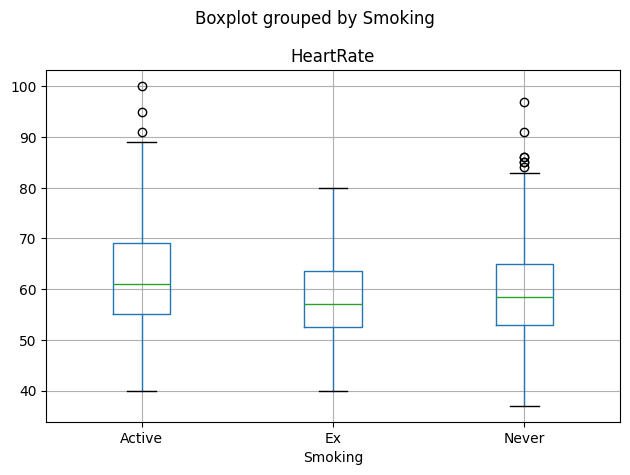

In [20]:
mi_df.boxplot(column="HeartRate", by="Smoking")
plt.tight_layout()

<Axes: xlabel='Smoking', ylabel='HeartRate'>

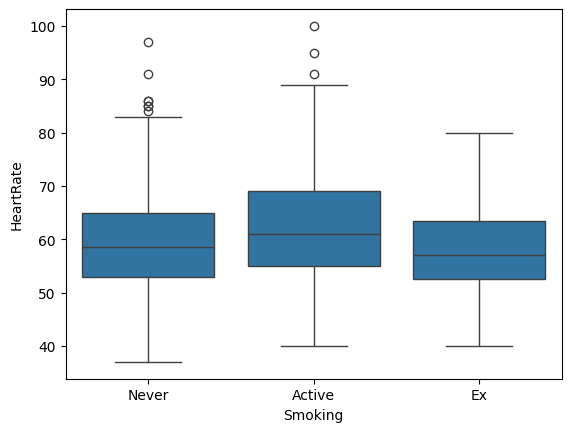

In [21]:
sns.boxplot(x='Smoking', y='HeartRate', data=mi_df)

### Interactivity

There is a lot of option to produce interactive reports using jupyter notebooks, for example:
- Plotly/Dash
- Bokeh
- ipython widgets
- voila
- ...

#### Ipywidgets

In [22]:
import ipywidgets as widgets
from ipywidgets import interact
from pathlib import Path
from IPython.display import Image

In [23]:
@interact
def filter_age(x=20):
    return mi_df.loc[mi_df.Age < x]

interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), Output()), _dom_classes=('widget-…

In [24]:
@interact
def show_images(file=Path("../images").glob("*.png")):
    display(Image(file))

interactive(children=(Dropdown(description='file', options=(PosixPath('../images/rnaseq.png'), PosixPath('../i…

#### Plotly

In [25]:
from plotly import express as px

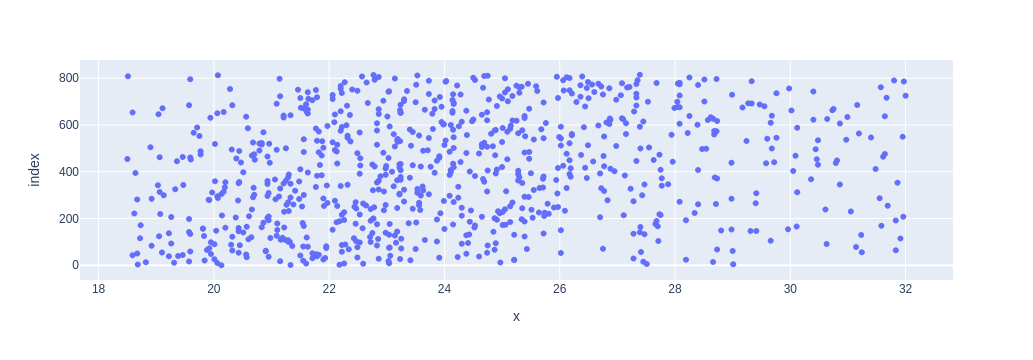

In [26]:
px.scatter(mi_df.Age, mi_df.BMI)

### Much more features

- Virtual environment support: venv and conda environment
- Presentations (Reveal.js and Rise)
- Dashboarding with voilà or others
- ...